In [6]:
import pandas as pd
import openpyxl
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf



In [2]:
full_table_grainonly = pd.read_csv('grainonly.csv')
full_table_grazeout = pd.read_csv('grazeout.csv')

full_table_grazeout.head()

,ET,NEE,ER,GPP,TMAX,TMIN,TAVG,HAVG,HDEG,CDEG,WCMN,WSPD,ATOT,RAIN,EVI
0,2.309095,-2.960843,2.133587,5.094429,80.83,43.69,61.20,68.34,2.74,0.0,41.38,6.04,17.04,0.01,0.4790
1,2.783142,-1.454638,2.423956,3.878594,70.63,45.37,59.11,67.70,7.00,0.0,44.75,8.01,16.62,0.00,0.5017
2,2.723914,-2.317222,3.211268,5.528491,82.17,42.67,61.70,72.43,2.58,0.0,44.25,9.18,16.43,0.00,0.5244
3,2.016559,-0.746232,3.477321,4.223553,68.79,51.31,61.28,76.49,4.95,0.0,-996.00,13.81,8.14,0.00,0.5471
4,1.951202,0.561190,2.524459,1.963269,54.41,46.53,49.99,75.20,14.53,0.0,40.10,10.78,2.26,0.20,0.5698


<module 'matplotlib.pyplot' from 'C:\\Users\\aksel\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

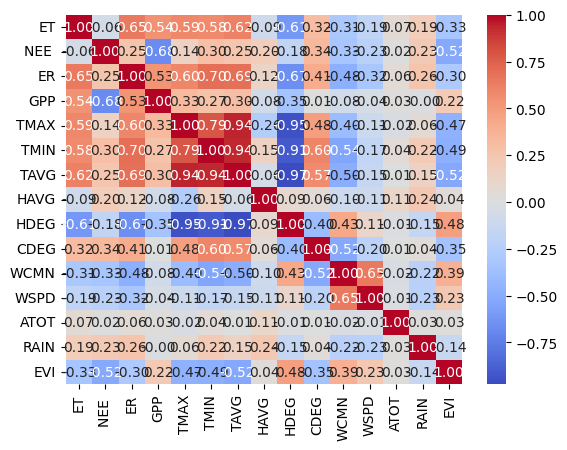

In [3]:
# Calculate the correlation matrix
correlation_matrix = full_table_grazeout.corr()

# Create the heatmap

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap = 'coolwarm')
plt

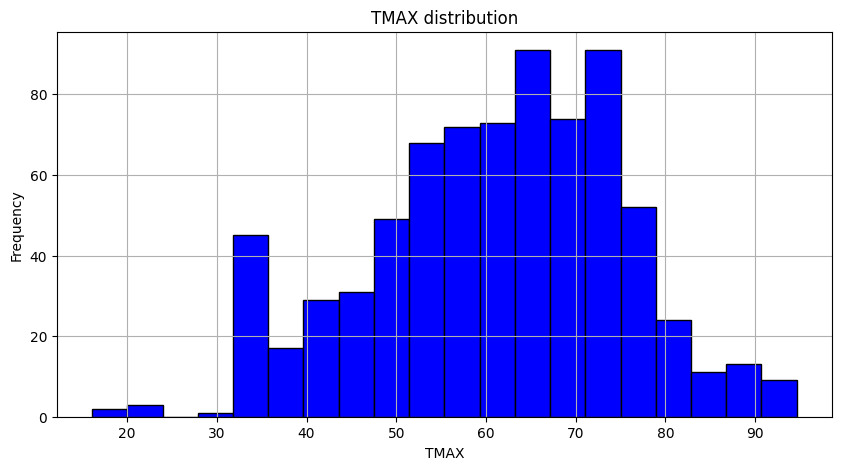

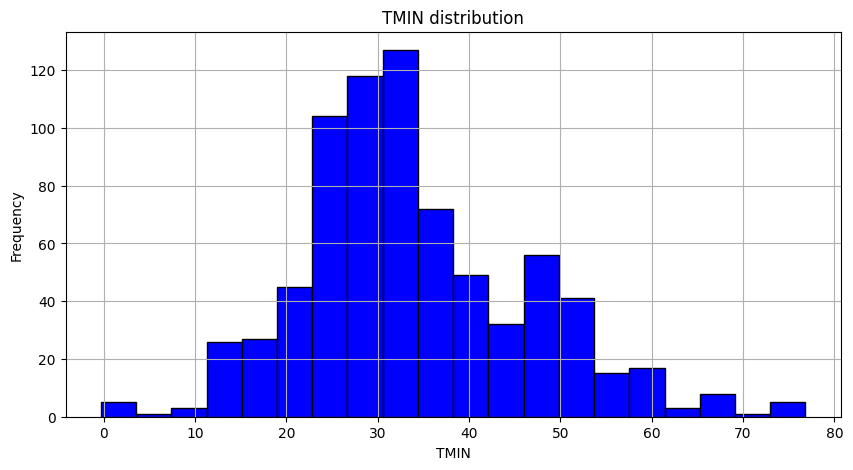

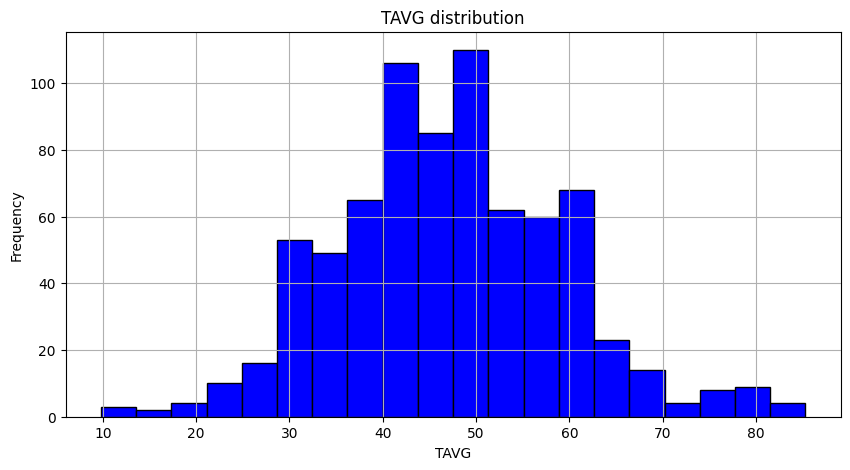

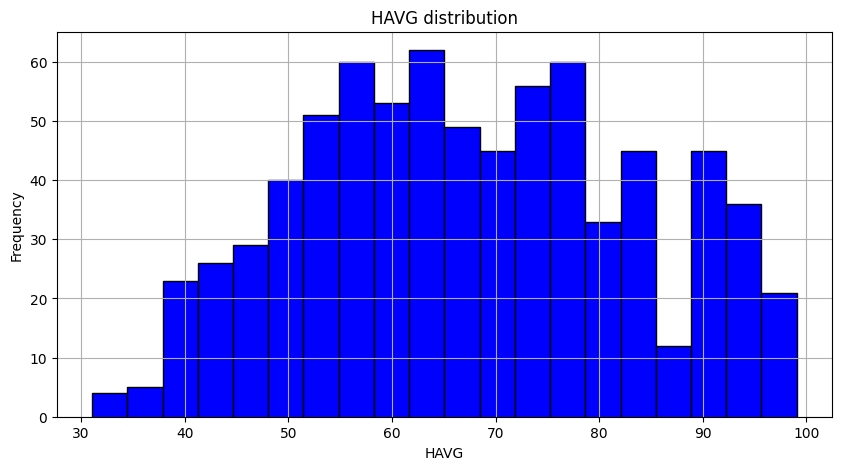

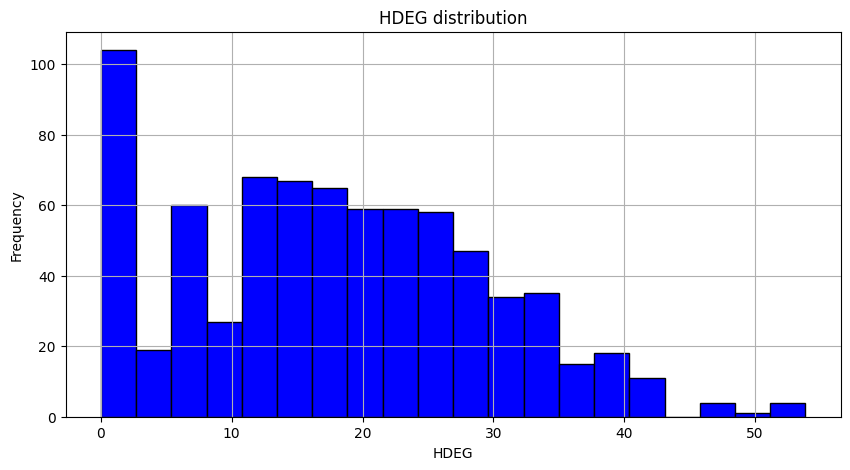

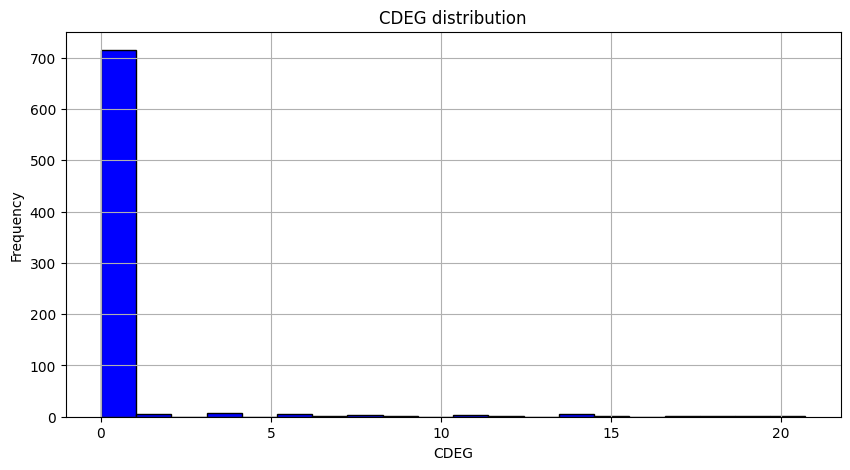

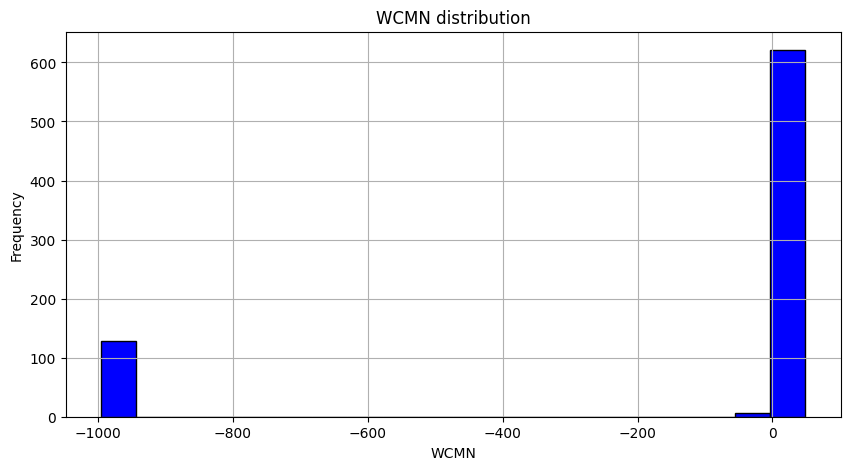

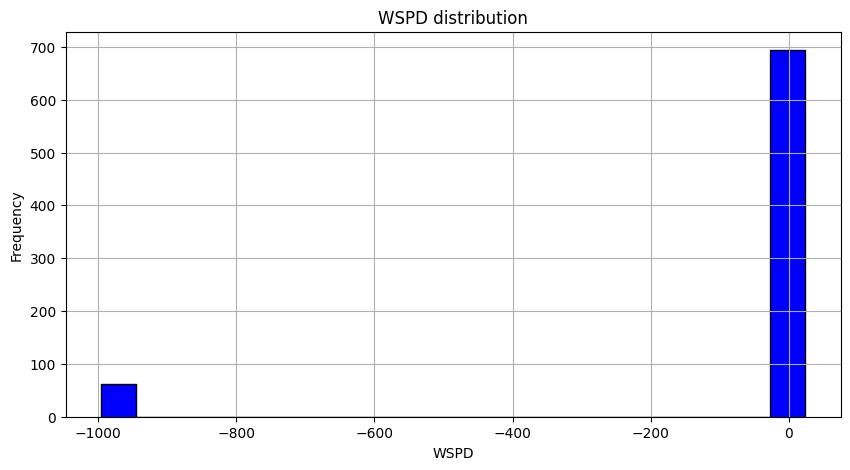

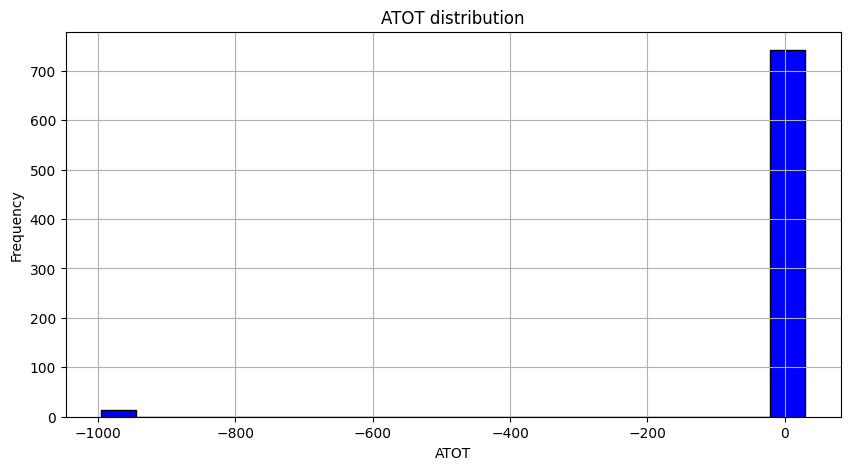

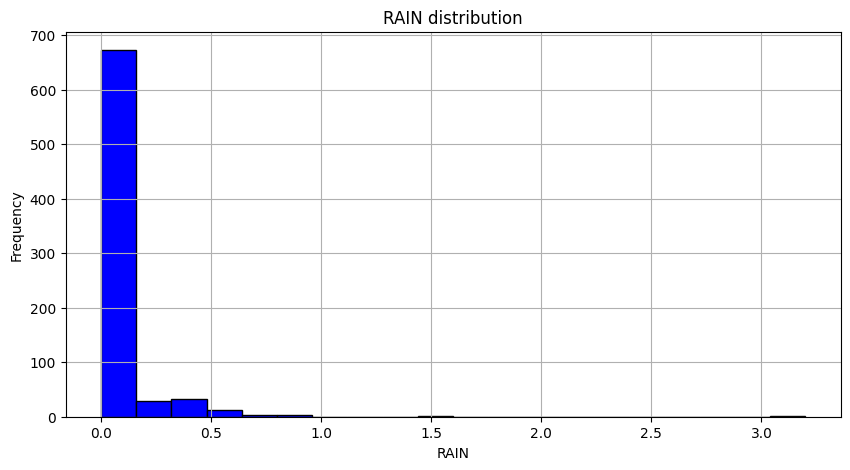

In [4]:
#Conducting Exploratory Data Analysis (EDA) on the data
#pairwise scatter plots for the grainonly data for 
weather_variables = ['TMAX','TMIN','TAVG','HAVG','HDEG','CDEG','WCMN','WSPD','ATOT','RAIN']
for vars in weather_variables:
    plt.figure(figsize=(10, 5))
    plt.hist(full_table_grainonly[vars], bins=20, color='blue', edgecolor='black')
    plt.title(f'{vars} distribution')
    plt.xlabel(vars)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

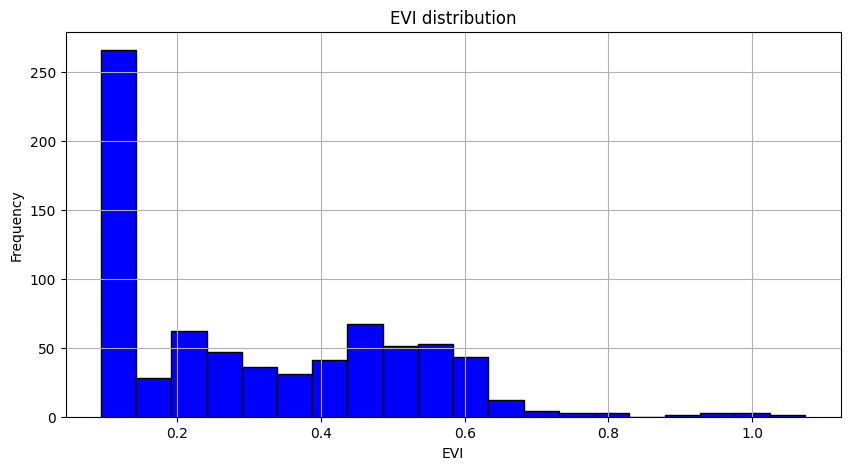

In [5]:
evi = ['EVI']
for vars in evi:
    plt.figure(figsize=(10, 5))
    plt.hist(full_table_grainonly[vars], bins=20, color='blue', edgecolor='black')
    plt.title(f'{vars} distribution')
    plt.xlabel(vars)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

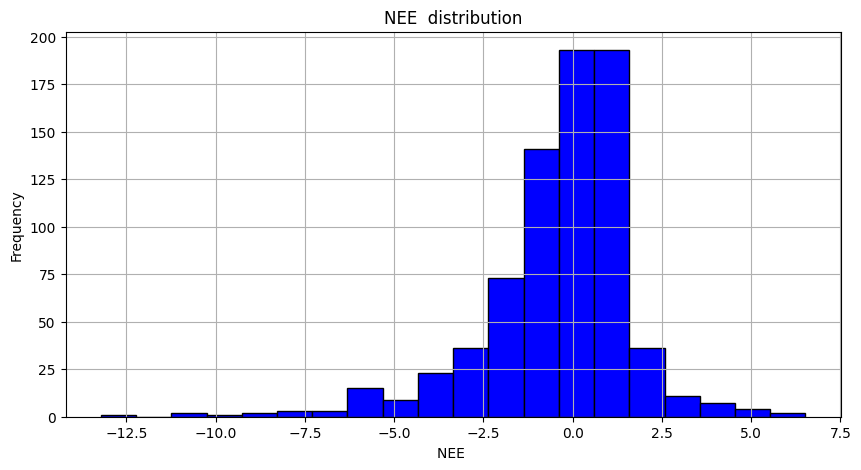

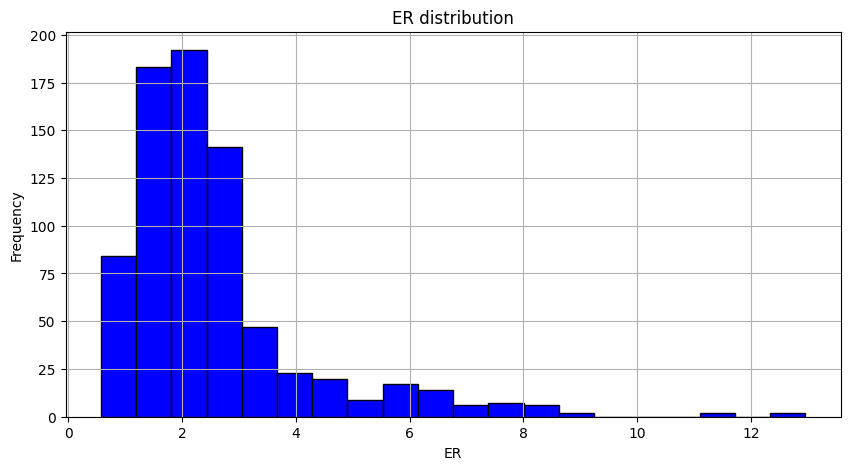

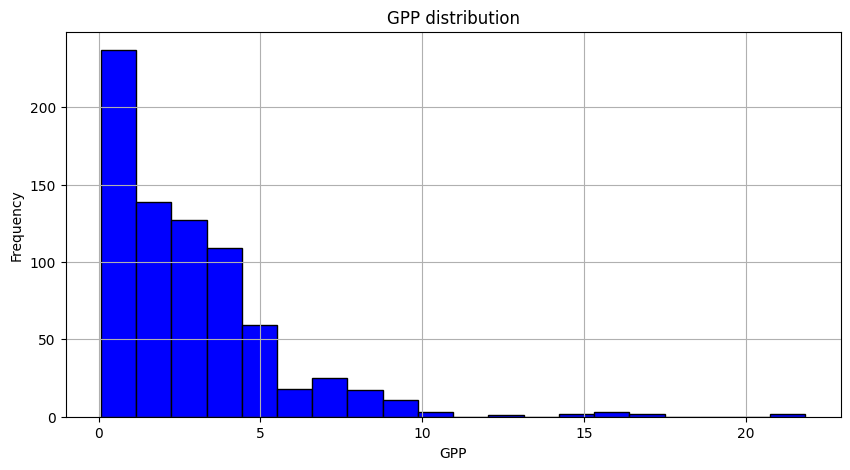

In [6]:
flux_vars=["NEE ","ER","GPP"]
for vars in flux_vars:
    plt.figure(figsize=(10, 5))
    plt.hist(full_table_grainonly[vars], bins=20, color='blue', edgecolor='black')
    plt.title(f'{vars} distribution')
    plt.xlabel(vars)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

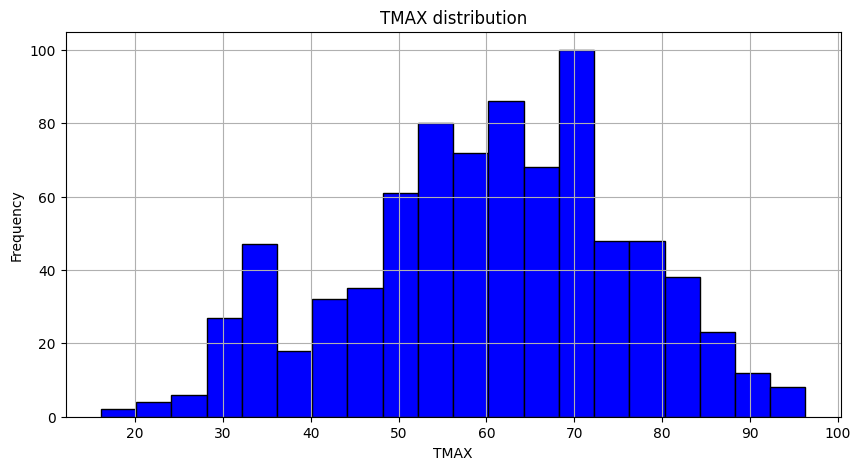

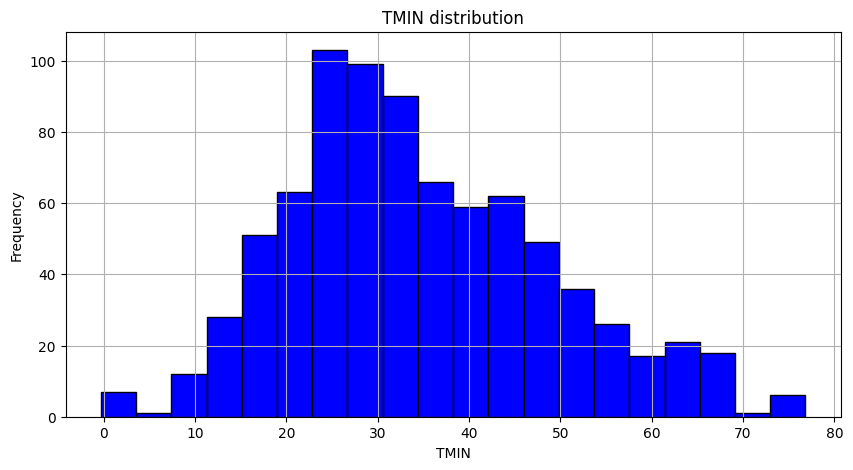

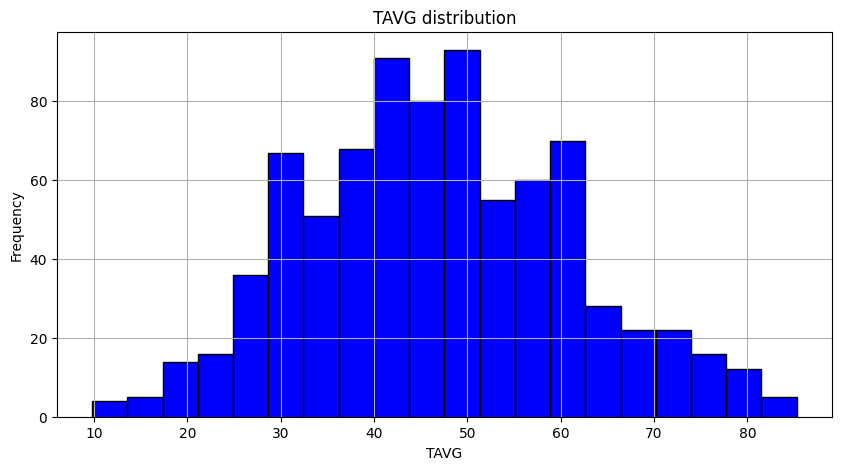

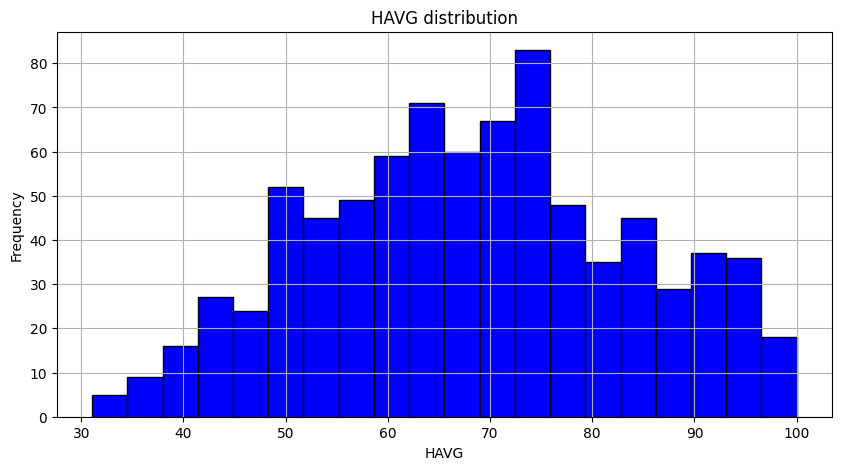

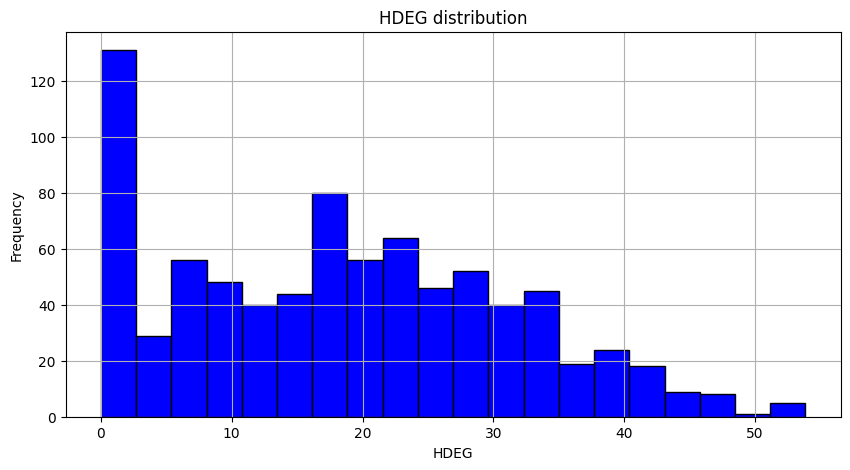

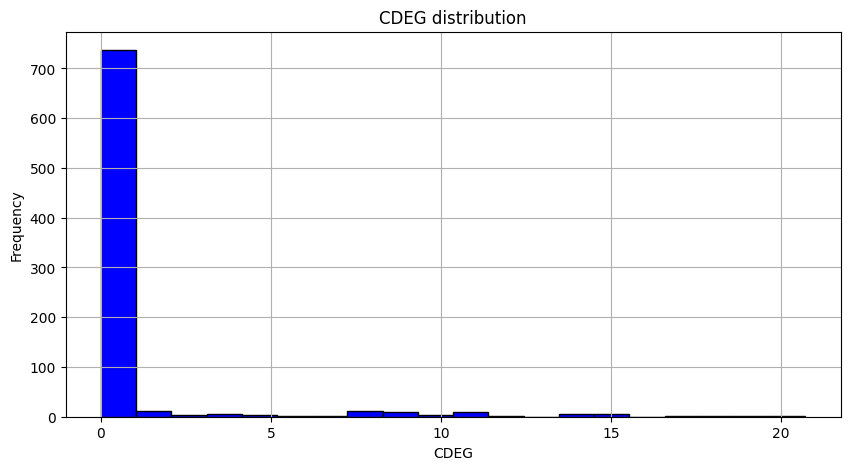

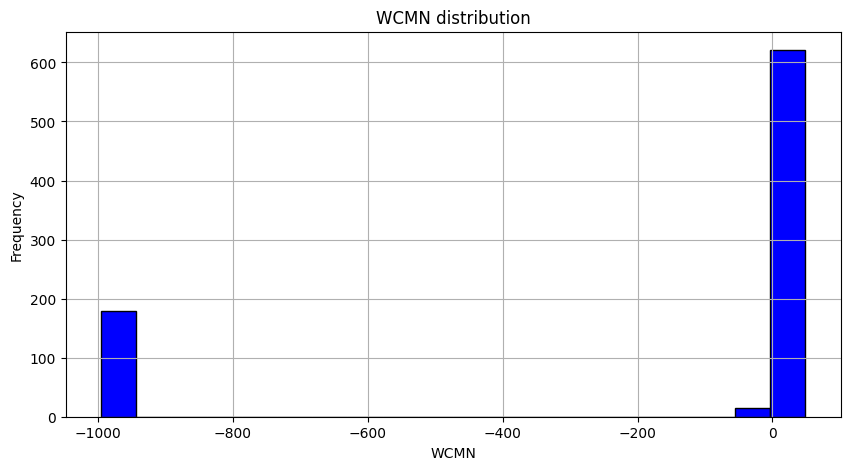

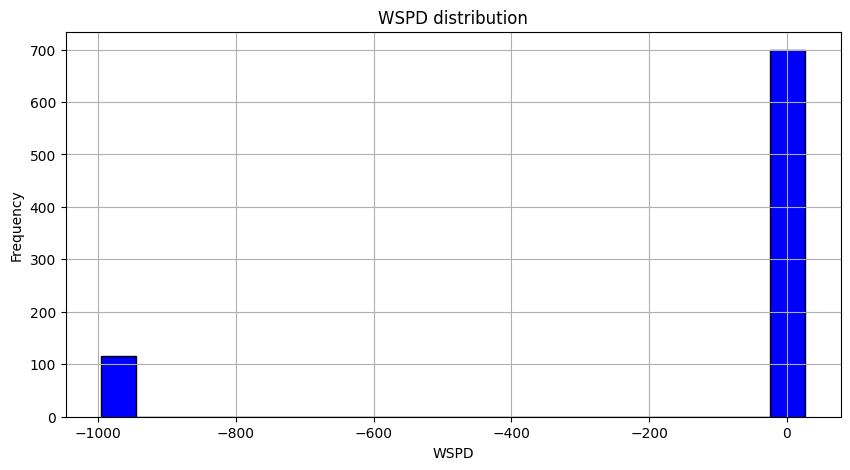

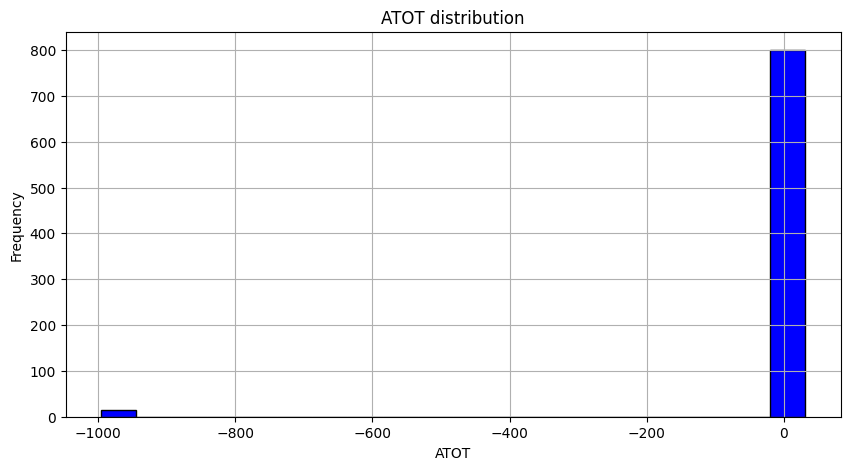

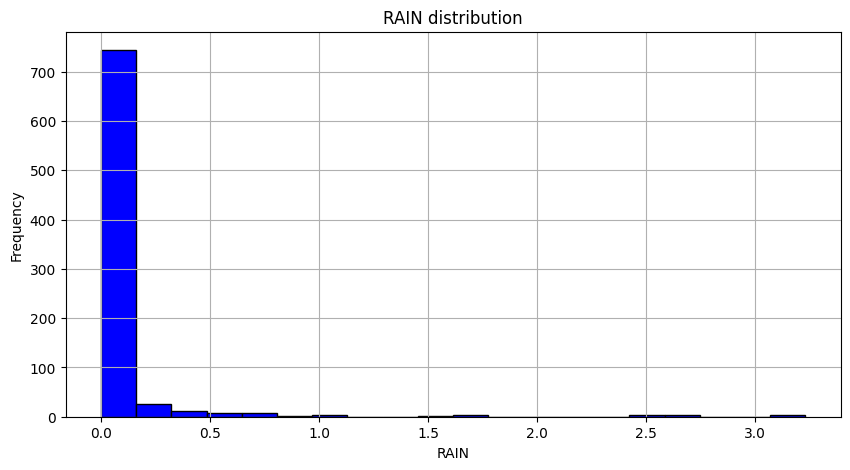

In [7]:
#Conducting Exploratory Data Analysis (EDA) on the data
#pairwise scatter plots for the grazeout data for 
weather_variables = ['TMAX','TMIN','TAVG','HAVG','HDEG','CDEG','WCMN','WSPD','ATOT','RAIN']
for vars in weather_variables:
    plt.figure(figsize=(10, 5))
    plt.hist(full_table_grazeout[vars], bins=20, color='blue', edgecolor='black')
    plt.title(f'{vars} distribution')
    plt.xlabel(vars)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

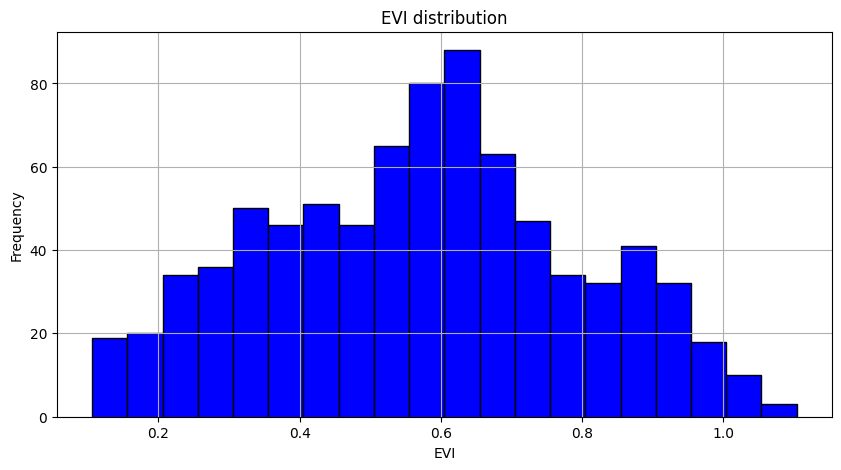

In [8]:

for vars in evi:
    plt.figure(figsize=(10, 5))
    plt.hist(pd.to_numeric(full_table_grazeout[vars]), bins=20, color='blue', edgecolor='black')
    plt.title(f'{vars} distribution')
    plt.xlabel(vars)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

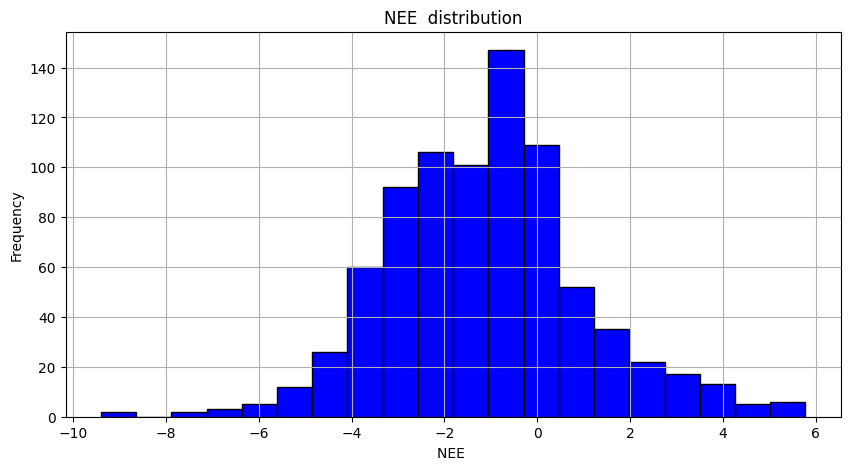

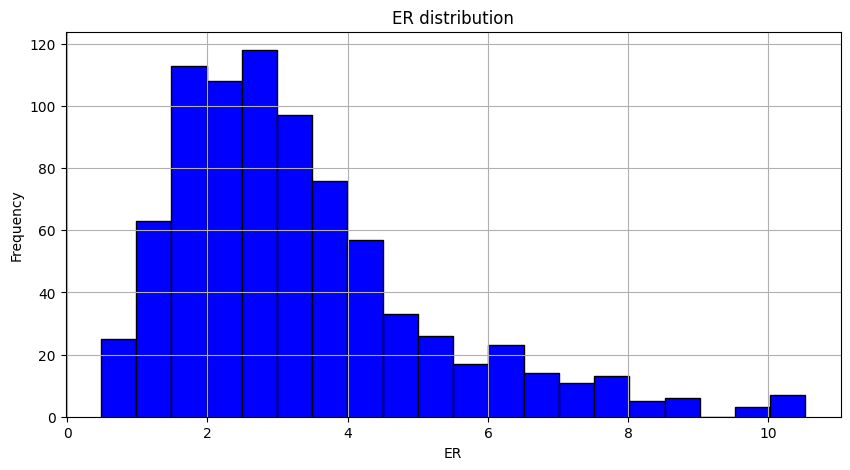

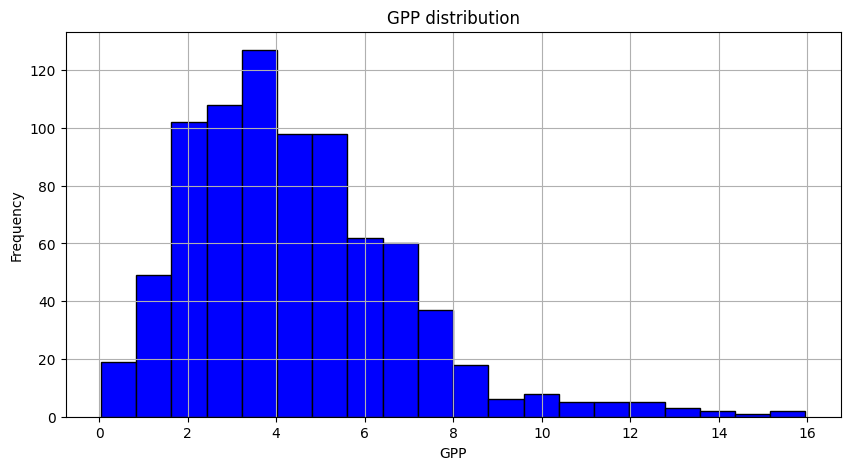

In [74]:
for vars in flux_vars:
    plt.figure(figsize=(10, 5))
    plt.hist(full_table_grazeout[vars], bins=20, color='blue', edgecolor='black')
    plt.title(f'{vars} distribution')
    plt.xlabel(vars)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [4]:
spearman_corr = full_table_grazeout.corr(method='spearman')

# Display the correlation coefficients with EVI
spearman_corr_evi = spearman_corr['EVI'].sort_values(ascending=False)
spearman_corr_evi

EVI     1.000000
HDEG    0.503534
GPP     0.269498
WCMN    0.096325
HAVG    0.045294
WSPD    0.039624
RAIN   -0.071786
ER     -0.319615
ET     -0.353730
CDEG   -0.382547
ATOT   -0.409485
TMIN   -0.470555
TMAX   -0.491616
NEE    -0.503633
TAVG   -0.525007
Name: EVI, dtype: float64

In [5]:
models = {
    'ET': 'ET ~ TMAX + TMIN + TAVG + HAVG',
    'NEE': 'NEE ~ TMAX + TMIN + TAVG + HAVG',
    'ER': 'ER ~ TMAX + TMIN + TAVG + HAVG',
    'GPP': 'GPP ~ TMAX + TMIN + TAVG + HAVG'
}

In [7]:
# Correct the column names by stripping whitespace
full_table_grazeout.columns = full_table_grazeout.columns.str.strip()

# Retry fitting the models
results_corrected = {}
for flux_attribute, formula in models.items():
    model = smf.ols(formula, data=full_table_grazeout)
    results_corrected[flux_attribute] = model.fit()

# Display the summary for each corrected model
model_summaries = {flux_attribute: result.summary().as_text() for flux_attribute, result in results_corrected.items()}
model_summaries


{'ET': '                            OLS Regression Results                            \n==============================================================================\nDep. Variable:                     ET   R-squared:                       0.390\nModel:                            OLS   Adj. R-squared:                  0.387\nMethod:                 Least Squares   F-statistic:                     129.6\nDate:                Mon, 15 Apr 2024   Prob (F-statistic):           1.46e-85\nTime:                        23:43:11   Log-Likelihood:                -1134.8\nNo. Observations:                 815   AIC:                             2280.\nDf Residuals:                     810   BIC:                             2303.\nDf Model:                           4                                         \nCovariance Type:            nonrobust                                         \n==============================================================================\n                 coef    std err

In [8]:
# Create a condensed summary of results
condensed_summaries = {}

for flux_attribute, result in results_corrected.items():
    # Extract key results
    r_squared = result.rsquared
    adj_r_squared = result.rsquared_adj
    significant_predictors = result.pvalues[result.pvalues < 0.05]
    predictors_summary = ", ".join([f"{pred} (coef={result.params[pred]:.3f}, p={result.pvalues[pred]:.3f})" 
                                    for pred in significant_predictors.index if pred != "Intercept"])
    
    # Create a compact summary
    condensed_summary = (f"Dependent Variable: {flux_attribute}\n"
                         f"R-squared: {r_squared:.3f}, Adjusted R-squared: {adj_r_squared:.3f}\n"
                         f"Significant Predictors: {predictors_summary if predictors_summary else 'None'}\n")
    
    condensed_summaries[flux_attribute] = condensed_summary

# Display the condensed summaries
for attribute, summary in condensed_summaries.items():
    print(summary + "\n---\n")


Dependent Variable: ET
R-squared: 0.390, Adjusted R-squared: 0.387
Significant Predictors: TAVG (coef=0.065, p=0.003), HAVG (coef=-0.007, p=0.012)

---

Dependent Variable: NEE
R-squared: 0.141, Adjusted R-squared: 0.137
Significant Predictors: TMAX (coef=-0.126, p=0.000), TMIN (coef=-0.054, p=0.031), TAVG (coef=0.218, p=0.000), HAVG (coef=0.013, p=0.021)

---

Dependent Variable: ER
R-squared: 0.506, Adjusted R-squared: 0.504
Significant Predictors: TAVG (coef=0.093, p=0.001), HAVG (coef=0.012, p=0.001)

---

Dependent Variable: GPP
R-squared: 0.112, Adjusted R-squared: 0.108
Significant Predictors: TMAX (coef=0.106, p=0.000), TMIN (coef=0.071, p=0.014), TAVG (coef=-0.124, p=0.017)

---



In [9]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import ElasticNet
import itertools

#Splitting the data into training and testing sets grainonly
train_grainonly, test_grainonly = train_test_split(full_table_grainonly, test_size=0.2, random_state=42)
#splttin the data into training and testing sets grazeout
train_grazeout, test_grazeout = train_test_split(full_table_grazeout, test_size=0.2, random_state=42)

#Training the model for grainonly data wihtout any flux variables
X_train_grainonly = train_grainonly.drop(flux_vars, axis=1)
for vars in flux_vars:
    y_train_grainonly = train_grainonly[vars]
    X_test_grainonly = test_grainonly.drop(flux_vars, axis=1)
    y_test_grainonly = test_grainonly[vars]
    model = LinearRegression()
    model_elast = ElasticNet()
    model.fit(X_train_grainonly, y_train_grainonly)
    model_elast.fit(X_train_grainonly, y_train_grainonly)
    y_pred_grainonly = model.predict(X_test_grainonly)
    y_pred_grainonly_elast = model_elast.predict(X_test_grainonly)
    mse = mean_squared_error(y_test_grainonly, y_pred_grainonly)
    mse_elast = mean_squared_error(y_test_grainonly, y_pred_grainonly_elast)
    r2 = r2_score(y_test_grainonly, y_pred_grainonly)
    r2_elast = r2_score(y_test_grainonly, y_pred_grainonly_elast)

    print(f'Mean Squared Error for {vars} in grainonly data using a Linear Regression Model is {mse}')
    print (f'Mean Squared Error for {vars} in grainonly data using an Elastic Net Model is {mse_elast} \n')


#Training the model for grazeout data wihtout any flux variables
X_train_grazeout = train_grazeout.drop(flux_vars, axis=1)
for vars in flux_vars:
    y_train_grazeout = train_grazeout[vars]
    X_test_grazeout = test_grazeout.drop(flux_vars, axis=1)
    y_test_grazeout = test_grazeout[vars]
    model = LinearRegression()
    model_elast = ElasticNet()
    model.fit(X_train_grazeout, y_train_grazeout)
    model_elast.fit(X_train_grazeout, y_train_grazeout)
    y_pred_grazeout = model.predict(X_test_grazeout)
    y_pred_grazeout_elast = model_elast.predict(X_test_grazeout)
    mse = mean_squared_error(y_test_grazeout, y_pred_grazeout)
    mse_elast = mean_squared_error(y_test_grazeout, y_pred_grazeout_elast)
    r2 = r2_score(y_test_grazeout, y_pred_grazeout)
    r2_elast = r2_score(y_test_grazeout, y_pred_grazeout_elast)
    mae = mean_absolute_error(y_test_grazeout, y_pred_grazeout)
    mae_elast = mean_absolute_error(y_test_grazeout, y_pred_grazeout_elast)

    print(f'Mean Squared Error for {vars} in grazeout data using a Linear Regression Model is {mse}')
    print (f'Mean Squared Error for {vars} in grazeout data using an Elastic Net Model is {mse_elast} \n')
    print(f'R2 Score for {vars} in grazeout data using a Linear Regression Model is {r2}')
    print(f'R2 Score for {vars} in grazeout data using an Elastic Net Model is {r2_elast} \n')
    print(f'Mean Absolute Error for {vars} in grazeout data using a Linear Regression Model is {mae}')
    print(f'Mean Absolute Error for {vars} in grazeout data using an Elastic Net Model is {mae_elast} \n')
    print('-------------------------------------------------------------')
print('#############################################################')
flux_var_pairs = list(itertools.combinations(flux_vars, 2))
flux_var_pairs = flux_var_pairs+[(y,x) for x,y in flux_var_pairs]
#Training the model for grainonly data with single flux variables
for predictor,target in flux_var_pairs:
    X_train_grainonly = train_grainonly.drop([var for var in flux_vars if var!=predictor ], axis=1)
    y_train_grainonly = train_grainonly[vars]
    X_test_grainonly = test_grainonly.drop([var for var in flux_vars if var!=predictor ], axis=1)
    y_test_grainonly = test_grainonly[target]
    model = LinearRegression()
    model_elast = ElasticNet()
    model.fit(X_train_grainonly, y_train_grainonly)
    model_elast.fit(X_train_grainonly, y_train_grainonly)
    y_pred_grainonly = model.predict(X_test_grainonly)
    y_pred_grainonly_elast = model_elast.predict(X_test_grainonly)
    mse = mean_squared_error(y_test_grainonly, y_pred_grainonly)
    mse_elast = mean_squared_error(y_test_grainonly, y_pred_grainonly_elast)
    r2 = r2_score(y_test_grainonly, y_pred_grainonly)
    r2_elast = r2_score(y_test_grainonly, y_pred_grainonly_elast)
    mae = mean_absolute_error(y_test_grainonly, y_pred_grainonly)
    mae_elast = mean_absolute_error(y_test_grainonly, y_pred_grainonly_elast)

    print(f'Mean Squared Error for {target} in grainonly data using {predictor} and a Linear Regression Model is {mse} with all other flux variables')
    print(f'Mean Squared Error for {target} in grainonly data using {predictor} and an Elastic Net Model is {mse_elast} with all other flux variables \n')
    print(f'R2 Score for {target} in grainonly data using {predictor} and a Linear Regression Model is {r2} with all other flux variables')
    print(f'R2 Score for {target} in grainonly data using {predictor} and an Elastic Net Model is {r2_elast} with all other flux variables \n')
    print(f'Mean Absolute Error for {target} in grainonly data using {predictor} and a Linear Regression Model is {mae} with all other flux variables')
    print(f'Mean Absolute Error for {target} in grainonly data using {predictor} and an Elastic Net Model is {mae_elast} with all other flux variables \n')
    print('-------------------------------------------------------------')
print('#############################################################')

#Training the model for grazeout data with single flux variables
for predictor,target in flux_var_pairs:
    X_train_grazeout = train_grazeout.drop([var for var in flux_vars if var != predictor], axis=1)
    y_train_grazeout = train_grazeout[vars]
    X_test_grazeout = test_grazeout.drop([ var for var in flux_vars if var != predictor], axis=1)
    y_test_grazeout = test_grazeout[target]
    model = LinearRegression()
    model_elast = ElasticNet()
    model.fit(X_train_grazeout, y_train_grazeout)
    model_elast.fit(X_train_grazeout, y_train_grazeout)
    y_pred_grazeout = model.predict(X_test_grazeout)
    y_pred_grazeout_elast = model_elast.predict(X_test_grazeout)
    mse = mean_squared_error(y_test_grazeout, y_pred_grazeout)
    mse_elast = mean_squared_error(y_test_grazeout, y_pred_grazeout_elast)
    r2 = r2_score(y_test_grazeout, y_pred_grazeout)
    r2_elast = r2_score(y_test_grazeout, y_pred_grazeout_elast)
    mae = mean_absolute_error(y_test_grazeout, y_pred_grazeout)
    mae_elast = mean_absolute_error(y_test_grazeout, y_pred_grazeout_elast)

    print(f'Mean Squared Error for {target} in grazeout data using {predictor} and a Linear Regression Model is {mse} with all other flux variables')
    print (f'Mean Squared Error for {target} in grazeout data using {predictor} and an Elastic Net Model is {mse_elast} with all other flux variables \n')
    print(f'R2 Score for {target} in grazeout data using {predictor} and a Linear Regression Model is {r2} with all other flux variables')
    print(f'R2 Score for {target} in grazeout data using {predictor} and an Elastic Net Model is {r2_elast} with all other flux variables \n')
    print(f'Mean Absolute Error for {target} in grazeout data using {predictor} and a Linear Regression Model is {mae} with all other flux variables')
    print(f'Mean Absolute Error for {target} in grazeout data using {predictor} and an Elastic Net Model is {mae_elast} with all other flux variables \n')
    print('-------------------------------------------------------------')
print('#############################################################')



Mean Squared Error for NEE  in grainonly data using a Linear Regression Model is 2.762635885292692
Mean Squared Error for NEE  in grainonly data using an Elastic Net Model is 5.545402050258961 

Mean Squared Error for ER in grainonly data using a Linear Regression Model is 1.4723049579110243
Mean Squared Error for ER in grainonly data using an Elastic Net Model is 1.8742257863699219 

Mean Squared Error for GPP in grainonly data using a Linear Regression Model is 2.8087101285777614
Mean Squared Error for GPP in grainonly data using an Elastic Net Model is 7.2277969529527795 

Mean Squared Error for NEE  in grazeout data using a Linear Regression Model is 3.232532990165486
Mean Squared Error for NEE  in grazeout data using an Elastic Net Model is 4.780365719492132 

R2 Score for NEE  in grazeout data using a Linear Regression Model is 0.4207699898928856
R2 Score for NEE  in grazeout data using an Elastic Net Model is 0.14341747093031876 

Mean Absolute Error for NEE  in grazeout data us

***Model Performance***
Linear Regression outperforms the elastic net model in most of the metrics and data sets as seein by the lower MSEs and R2 Scores.
***Model Suitability**
The suitability of both models seems to be highly variable by the scenarios of which data set is being used and what is being targeted. 


***Metrics**
When modelling the flux variables NEE seems to be the most challenging metric to model . It generally has the highest values of Mean Square Error and Mean Absolute Error
***Data Set ***
The two models performed better on the grain only data set as compared to the grazeout data set. This may be caused by underlying data characteristics not analysed or because of noise in the collection of grazeout data

There was negative r2 values in the prediction of NEE from ER and GPP suggesting a misfit of the models to these specific relationship.